### Analisis del clima

In [ ]:
# Importando las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importando el conjunto de datos
def importar_csv():
    from google.colab import files
    import pandas as pd

    print("Selecciona el archivo CSV desde tu computadora")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"Archivo cargado: {filename}")
        df = pd.read_csv(filename)
        return df

# Llamar a la función
df = importar_csv()
df.head()

Selecciona el archivo CSV desde tu computadora


Saving seattle-weather.csv to seattle-weather (1).csv
Archivo cargado: seattle-weather (1).csv


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
# Mostrando el nombre y tipo de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
# Creando un resumen estádistico
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
# Identificando si el dataset tiene datos nulos
df.isna().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
# Verificando si el dataset tiene datos duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
# Filtra y muestra la(s) fila(s) del DataFrame 'df' donde la temperatura mínima ('temp_min')
# es igual al valor más bajo registrado en toda la columna 'temp_min'.
df[df['temp_min'] == min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [ ]:
# Muestra la temperatura máxima
df[df['temp_max'] == max(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


### Gráfica de la temperatura máxima

<Axes: xlabel='temp_max', ylabel='Count'>

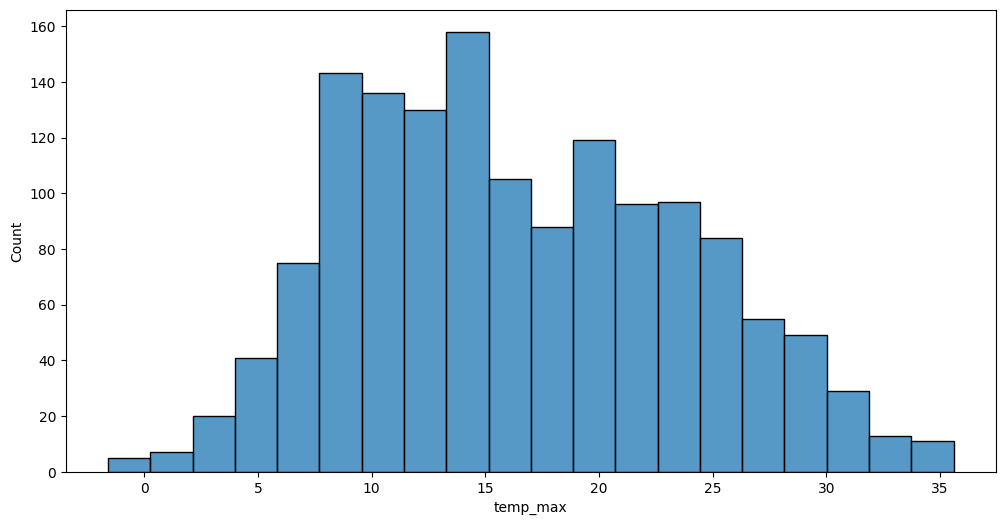

In [ ]:

plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max,bins=20)

### Gráfica de la temperatura mínima

<Axes: xlabel='temp_min', ylabel='Count'>

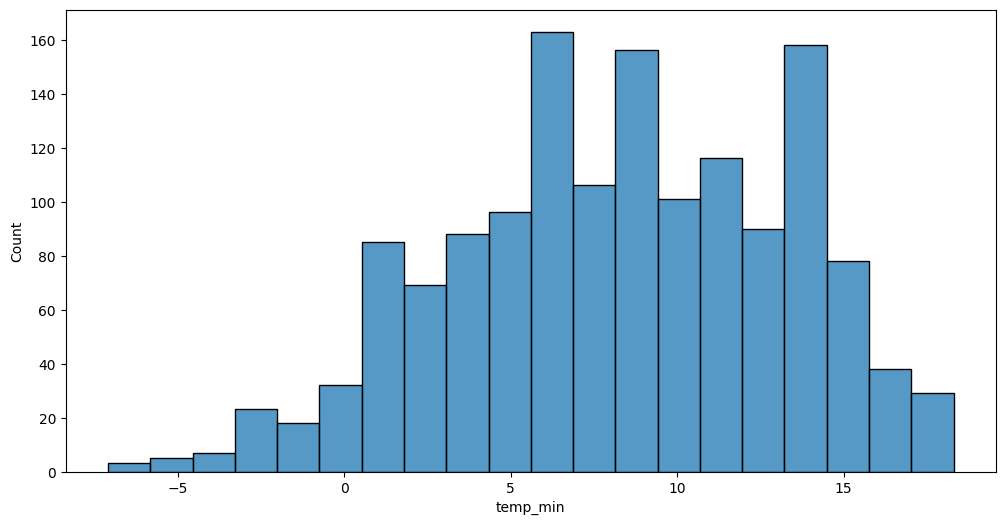

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20)

In [ ]:
# Selecciona y muestra únicamente las columnas 'date' y 'temp_max' de todo el DataFrame 'df'.
df.loc[:, ['date', 'temp_max']]

# Convierte los valores de la columna 'date' al tipo de dato datetime de pandas
# para facilitar operaciones con fechas (como filtrado, ordenamiento o extracción de partes de la fecha).
df['date'] = pd.to_datetime(df['date'])


### La temperatura máxima para cada mes

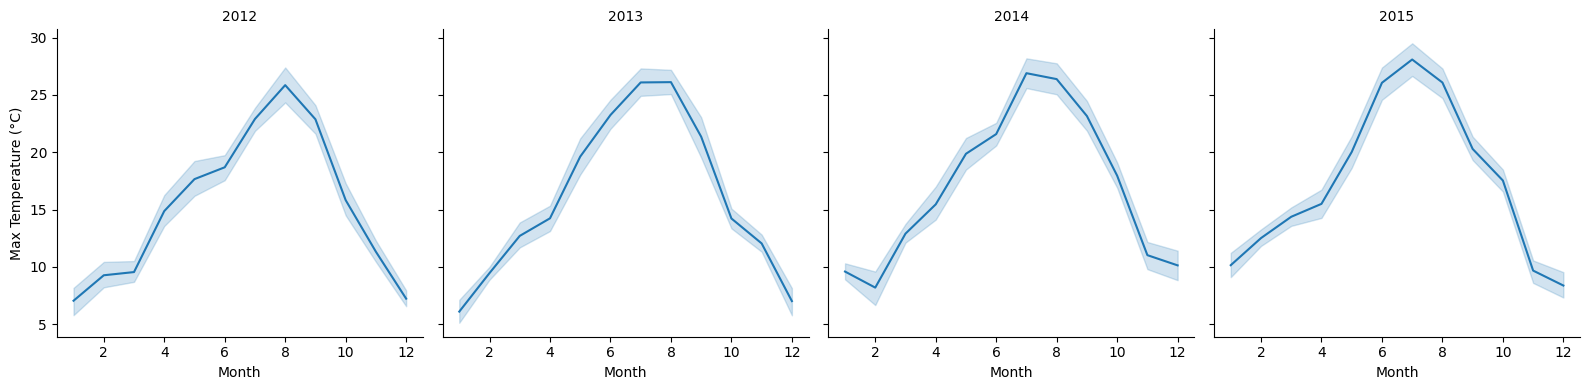

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

### La temperatura mínima para cada mes

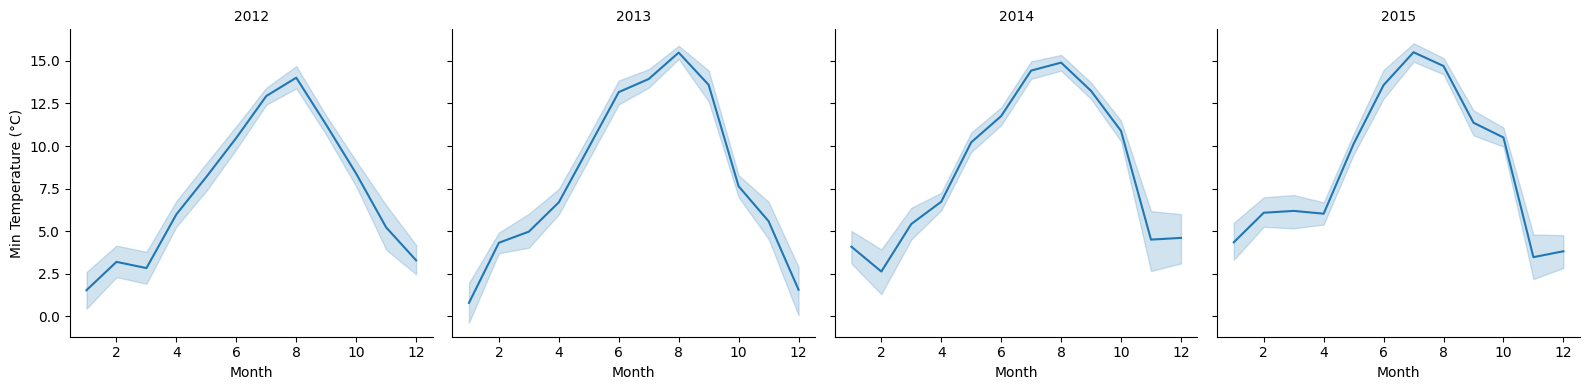

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

### Gráfico de lluvia

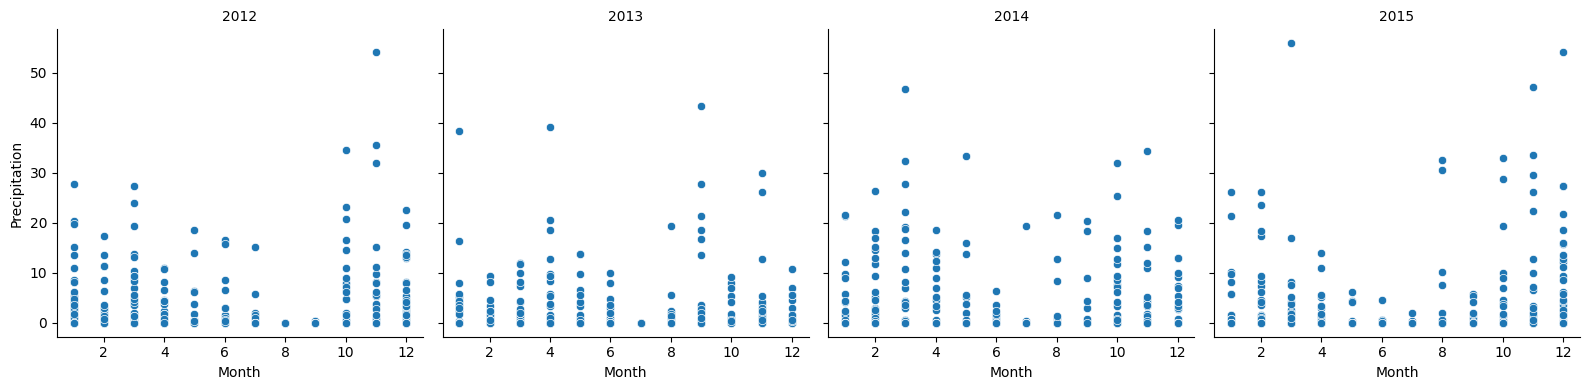

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

### Gráfico de viento

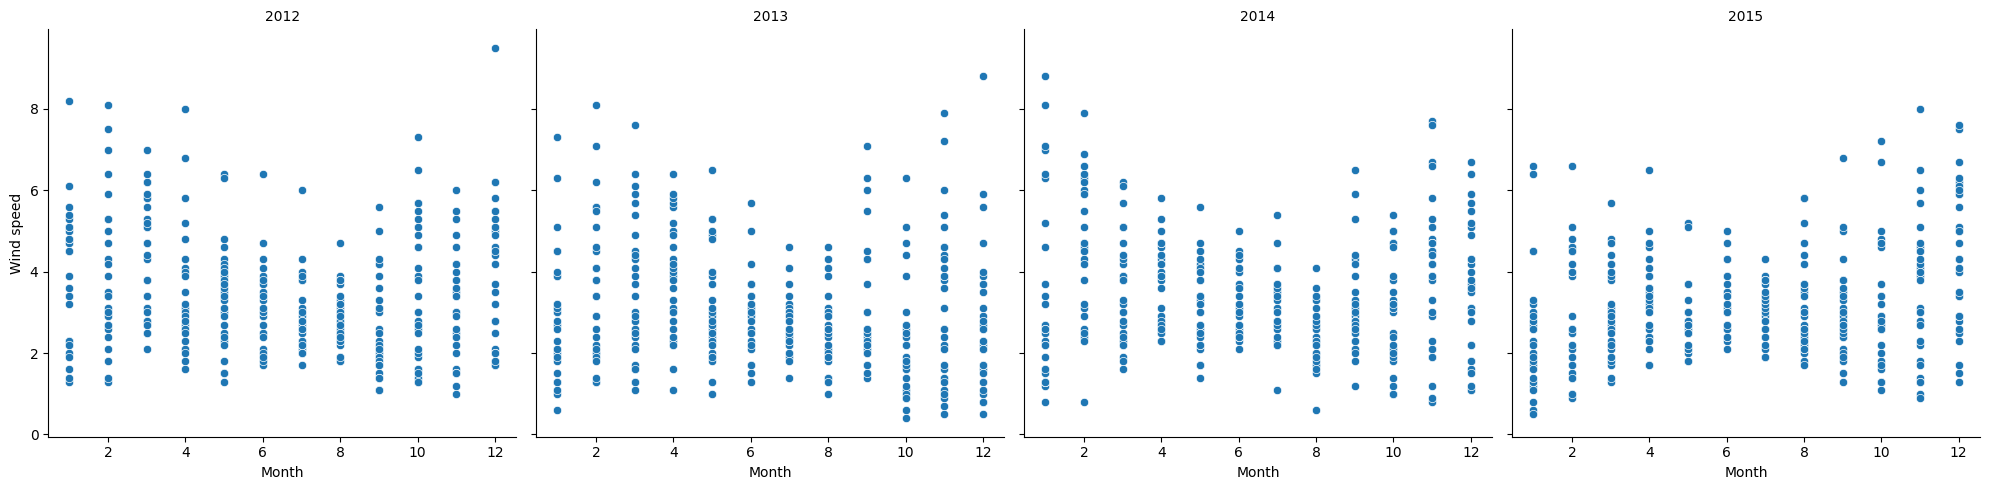

In [ ]:

g = sns.FacetGrid(df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [ ]:
# Cuenta el número de evento
df.weather.value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


### Gráfica de eventos por tipo

<Axes: xlabel='weather', ylabel='count'>

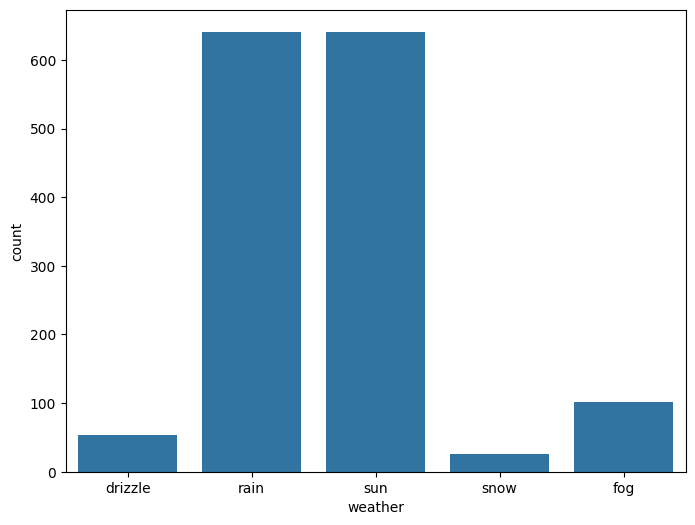

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df.weather)

### Gráfico con porcentajes

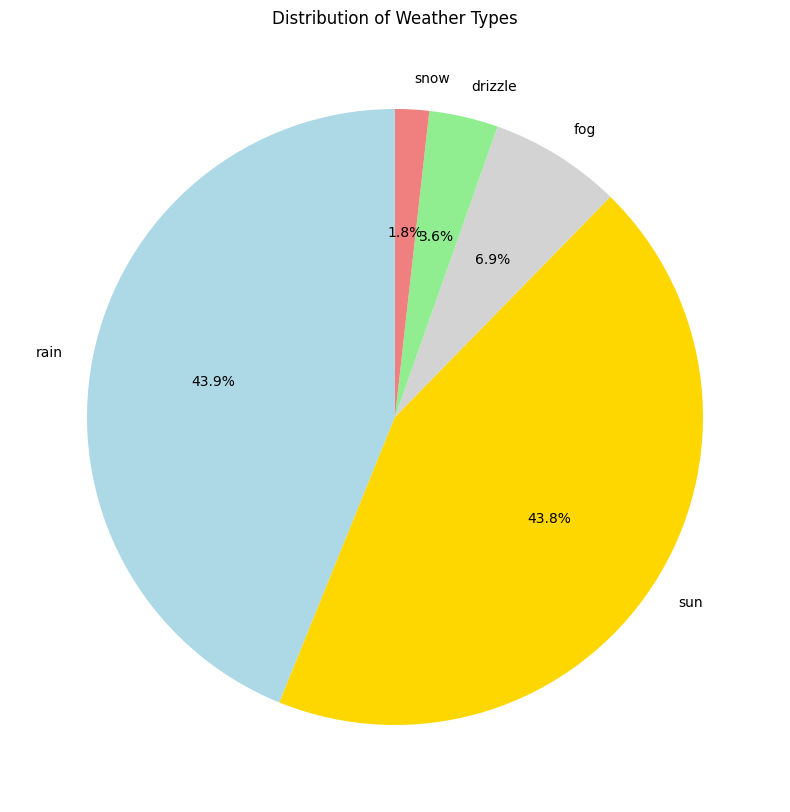

In [ ]:
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [ ]:
# Elimina la columna 'month' del DataFrame 'df'. El parámetro axis=1 indica que se trata de una columna,
# y inplace=True aplica el cambio directamente sobre el DataFrame original.
df.drop('month', axis=1, inplace=True)

# Elimina la columna 'year' del DataFrame 'df' de forma similar a la línea anterior.
df.drop('year', axis=1, inplace=True)


In [ ]:
# Importando las librerías para el entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [ ]:
# Importa la clase LabelEncoder de scikit-learn, que se utiliza para convertir etiquetas categóricas en valores numéricos.
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del codificador.
le = LabelEncoder()

# Aplica el codificador a la columna 'weather' del DataFrame 'df'.

# Transforma los valores categóricos de la columna 'weather' en números enteros.
# Esto es útil para algoritmos de machine learning que solo aceptan variables numéricas.
df['weather'] = le.fit_transform(df['weather'])


In [ ]:
# Se definen las variables predictoras (X) y la variable objetivo (y).
# 'X' incluye columnas numéricas relevantes para predecir el clima,
# mientras que 'y' contiene la variable categórica 'weather' ya codificada numéricamente.
x = df.drop(columns=['weather','date'])
y = df['weather']

# Divide los datos en conjuntos de entrenamiento y prueba.
# El 80% de los datos se usa para entrenamiento y el 20% para prueba.
# El parámetro random_state asegura que la división sea reproducible.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Se crea una instancia del clasificador Naive Bayes Gaussiano.
nb_model = GaussianNB()

# Se entrena el modelo con los datos de entrenamiento.
nb_model.fit(X_train,y_train)

# Se realizan predicciones sobre el conjunto de prueba.
y_pred = nb_model.predict(X_test)

# Se calcula la precisión del modelo (porcentaje de aciertos sobre el total).
accuracy = accuracy_score(y_test, y_pred)

# Se genera la matriz de confusión, que muestra los aciertos y errores por clase.
conf_matrix = confusion_matrix(y_test, y_pred)

# Se obtiene un reporte con métricas de evaluación por clase: precisión, recall y F1-score.
# El parámetro zero_division=1 evita errores en métricas cuando hay división por cero.
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Se imprime la precisión general del modelo con dos decimales.
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


## Interpretando el resultado
* En este caso, una precisión de 0.83 indica que de cada 100 casos, el modelo acierta en 83 y se equivoca en 17.

In [ ]:
# Matriz de confusión
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293



## Interpretando los resultados
| Clase | Descripción (si sabes lo que representa) | Precision | Recall | F1-score | Apoyo (support) |
| ----- | ---------------------------------------- | --------- | ------ | -------- | --------------- |
| 0     | (¿quizá 'tormenta' o 'niebla'?)          | 0.00      | 0.00   | 0.00     | 9               |
| 1     | (¿quizá 'lluvia ligera'?)                | 1.00      | 0.00   | 0.00     | 25              |
| 2     | (¿quizá 'soleado'?)                      | 0.96      | 0.91   | 0.94     | 120             |
| 3     | (¿quizá 'nublado'?)                      | 0.57      | 0.50   | 0.53     | 8               |
| 4     | (¿quizá 'parcialmente nublado'?)         | 0.76      | 0.99   | 0.86     | 131             |


* Clase 2 y Clase 4: El modelo las predice muy bien (alta precisión y recall).
* Clase 0 y Clase 1: El modelo no las reconoce en absoluto. Todo se clasifica como clase 4.
* Clase 3: Precisión y recall aceptables, pero necesita mejorar.

### Probando el modelo de predicción

In [ ]:
import pandas as pd

# Primer escenario
# Crear un DataFrame con un solo registro
nuevo_dato = pd.DataFrame({
    'temp_min': [10.0],
    'temp_max': [22.0],
    'precipitation': [0.5],
    'wind': [3.2]
})


### Usar el modelo entrenado para predecir

In [ ]:
nuevo_dato = nuevo_dato[X_train.columns]

prediccion = nb_model.predict(nuevo_dato)

clima_predicho = le.inverse_transform(prediccion)
print("Clima predicho:", clima_predicho[0])

Clima predicho: rain


### Segundo escenario

In [ ]:

escenario_1 = pd.DataFrame({
    'temp_min': [5.0],
    'temp_max': [12.0],
    'precipitation': [3.5],
    'wind': [1.0]
})
escenario_1 = nuevo_dato[X_train.columns]
prediccion_1 = nb_model.predict(escenario_1)
clima_1 = le.inverse_transform(prediccion_1)
print("Escenario 1 - Clima predicho:", clima_1[0])


Escenario 1 - Clima predicho: rain


### Tercer escenario

In [ ]:
escenario_2 = pd.DataFrame({
    'temp_min': [22.0],
    'temp_max': [35.0],
    'precipitation': [0.0],
    'wind': [4.5]
})
escenario_2 = nuevo_dato[X_train.columns]
prediccion_2 = nb_model.predict(escenario_2)
clima_2 = le.inverse_transform(prediccion_2)
print("Escenario 2 - Clima predicho:", clima_2[0])


Escenario 2 - Clima predicho: rain
